In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors
import os
import numpy as np
import math
import cmath

In [153]:
n=1
k=.9
a=.9
path = "/home/jsk/cylinder/fixed_surfaces/n1k9a8" #first example path
T=.01
alpha=-4.0
c=4.5

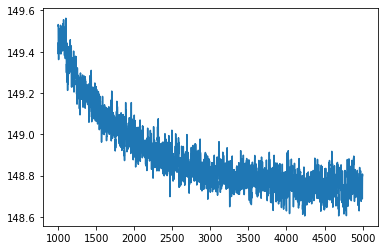

In [154]:
#retrive the file with H(t) time series
data= pd.read_csv(os.path.join(path, "alpha_-4.0_C_4.5.csv")).loc[:,"field_energy"]
energy_series=data.map(lambda x: complex(x).real)
plt.plot(energy_series[1000:])

In [155]:
energy_series[1000:].idxmax(),energy_series[1361]

(1101, 149.1832839179254)

In [156]:
#retrieve equilibration point, discard start of data
cutoff=pd.read_csv(os.path.join(path, "global_cutoff.csv"), index_col=0).loc[4.5,str(alpha)]
cutoff
cutoff=4000
energy_series_cut=energy_series[cutoff:]

In [168]:
#free energy difference (to reference system) = 
# -kbT ln <e^{energy diff to reference system/ kbT}>
exp_energy_series= energy_series_cut.map(lambda x: math.exp(x/T)) #difference -(E0-EA) goes in exponent
                                                                  # since recorded E=Ea-E0, put +E
plt.plot(exp_energy_series) 

OverflowError: math range error

In [166]:
Z=sum(exp_energy_series)/len(exp_energy_series)
Z

3.214100229876766e-50

In [167]:
F=T*math.log(Z)
F

-1.1396170719747287